<a href="https://colab.research.google.com/github/kjcoursera/AB_Testing/blob/main/Cookie_cat_AB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Hypothesis Testing
from scipy.stats import shapiro
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
print(os.listdir('./gdrive/MyDrive/Datasets/AB_Testing'))


['cookie_cats.csv']


In [ ]:
path = './gdrive/MyDrive/Datasets/AB_Testing/cookie_cats.csv'

In [ ]:
df = pd.read_csv(path)
print(len(df))

90189


In [ ]:
print("# DIMENSIONS -------------------------")
print('Observation: ', df.shape[0], "Columns:", df.shape[1])

# DIMENSIONS -------------------------
Observation:  90189 Columns: 5


In [ ]:
print("# DTYPES -------------------------")
print("No of Object variables: ", len(df.select_dtypes("object").columns))
print("No of Integer variables: ", len(df.select_dtypes("integer").columns))
print("No of Float variables: ", len(df.select_dtypes("float").columns))
print("No of Boolean variables: ", len(df.select_dtypes("bool").columns))

# DTYPES -------------------------
No of Object variables:  1
No of Integer variables:  2
No of Float variables:  0
No of Boolean variables:  2


In [ ]:
print("# MISSING VALUE -------------------------")
print("Are there any missing values? \n ", np.where(df.isnull().values.any() == False,
                                                    "No missing value!", "Data includes missing value!"),"\n")

# MISSING VALUE -------------------------
Are there any missing values? 
  No missing value! 



In [ ]:
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB
None
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
5     540  gate_40             187         True         True
6    1066  gate_30               0        False        False
7    1444  gate_40              

In [ ]:
print("unique visitors: " ,df.userid.nunique() == df.shape[0])

unique visitors:  True


In [ ]:
print(df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T)

                  count       mean         std  ...    95%    99%      max
sum_gamerounds  90189.0  51.872457  195.050858  ...  221.0  493.0  49854.0

[1 rows x 14 columns]


In [ ]:
# A/B Groups & Target Summary Stats

print(df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"]))

         count  median       mean         std    max
version                                             
gate_30  44700      17  52.456264  256.716423  49854
gate_40  45489      16  51.298776  103.294416   2640


Text(0.5, 1.0, 'Distribution of Two Groups')

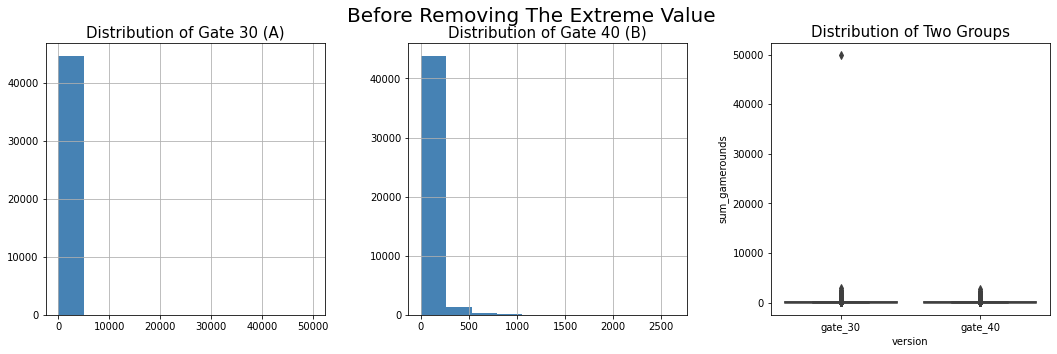

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))
df[(df.version == "gate_30")].hist("sum_gamerounds", ax = axes[0],color = "steelblue", bins=10)
df[(df.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue", bins=10)
sns.boxplot(x = df.version, y = df.sum_gamerounds, ax = axes[2])
plt.suptitle("Before Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

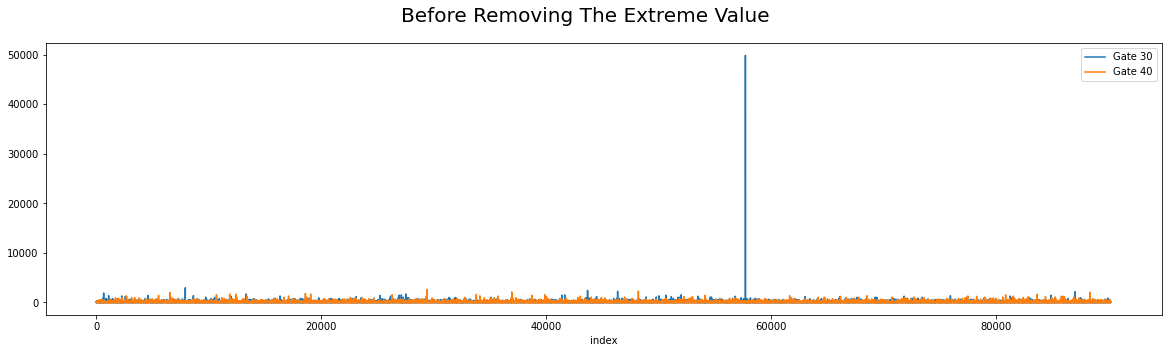

In [ ]:
df[df.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
df[df.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")
plt.suptitle("Before Removing The Extreme Value", fontsize = 20);

In [ ]:
df = df[df.sum_gamerounds < df.sum_gamerounds.max()]

In [ ]:
# Summary Stats: sum_gamerounds
print(df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T)

                  count       mean         std  ...    95%    99%     max
sum_gamerounds  90188.0  51.320253  102.682719  ...  221.0  493.0  2961.0

[1 rows x 14 columns]


Text(0.5, 1.0, 'Distribution of Two Groups')

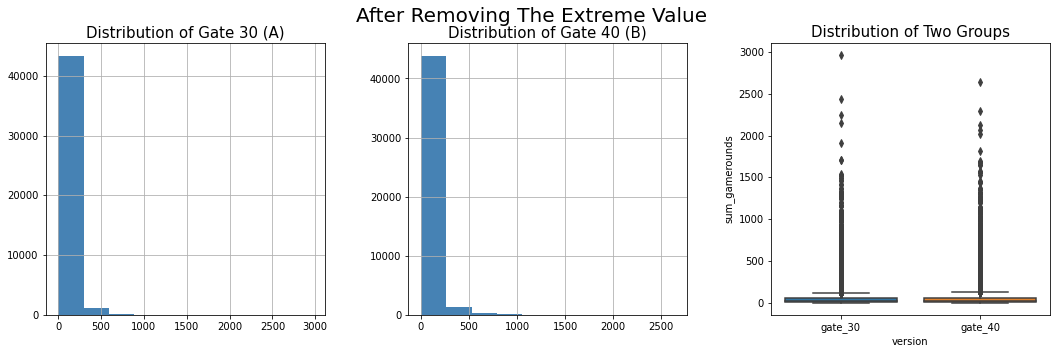

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))
df[(df.version == "gate_30")].hist("sum_gamerounds", ax = axes[0],color = "steelblue", bins=10)
df[(df.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue", bins=10)
sns.boxplot(x = df.version, y = df.sum_gamerounds, ax = axes[2])
plt.suptitle("After Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

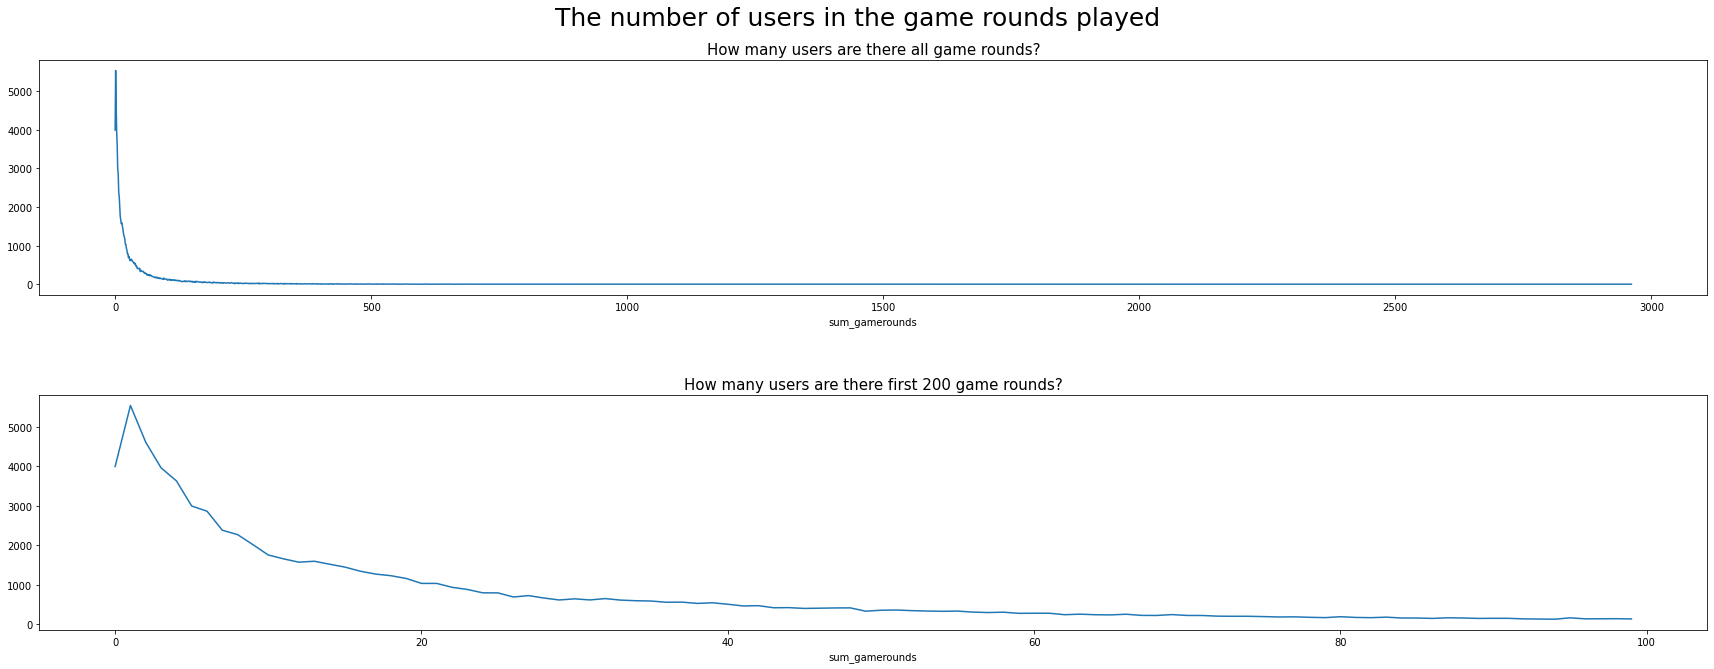

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (25,10))
df.groupby("sum_gamerounds").userid.count().plot(ax = axes[0])
df.groupby("sum_gamerounds").userid.count()[:100].plot(ax = axes[1])
plt.suptitle("The number of users in the game rounds played", fontsize = 25)
axes[0].set_title("How many users are there all game rounds?", fontsize = 15)
axes[1].set_title("How many users are there first 200 game rounds?", fontsize = 15)
plt.tight_layout(pad=5);

In [ ]:
print(df.groupby("sum_gamerounds").userid.count().reset_index().head(20))

    sum_gamerounds  userid
0                0    3994
1                1    5538
2                2    4606
3                3    3958
4                4    3629
5                5    2992
6                6    2861
7                7    2379
8                8    2267
9                9    2013
10              10    1752
11              11    1654
12              12    1570
13              13    1594
14              14    1519
15              15    1446
16              16    1342
17              17    1269
18              18    1228
19              19    1158


In [ ]:
# How many users reached gate 30 & gate 40 levels?
print(df.groupby("sum_gamerounds").userid.count().loc[[30,40]])

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64


In [ ]:
# A/B Groups & Target Summary Stats
print(df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"]))

         count  median       mean         std   max
version                                            
gate_30  44699      17  51.342111  102.057598  2961
gate_40  45489      16  51.298776  103.294416  2640


In [ ]:
# Retention Problem
pd.DataFrame({"RET1_COUNT": df["retention_1"].value_counts(),
              "RET7_COUNT": df["retention_7"].value_counts(),
              "RET1_RATIO": df["retention_1"].value_counts() / len(df),
              "RET7_RATIO": df["retention_7"].value_counts() / len(df)})

 # 55 percent of the players didn't play the game 1 day after insalling
   # 81 percent of the players didn't play the game 7 day after insalling


,RET1_COUNT,RET7_COUNT,RET1_RATIO,RET7_RATIO
False,50035,73408,0.554786,0.813944
True,40153,16780,0.445214,0.186056


In [ ]:
print(df.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]))

                     count  median       mean         std   max
version retention_1                                            
gate_30 False        24665       6  16.359092   36.528426  1072
        True         20034      48  94.411700  135.037697  2961
gate_40 False        25370       6  16.340402   35.925756  1241
        True         20119      49  95.381182  137.887256  2640


In [ ]:
print(df.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]))

                     count  median        mean         std   max
version retention_7                                             
gate_30 False        36198      11   25.796508   43.316158   981
        True          8501     105  160.117516  179.358560  2961
gate_40 False        37210      11   25.856356   44.406112  2640
        True          8279     111  165.649837  183.792499  2294


In [ ]:
df["Retention"] = np.where((df.retention_1 == True) & (df.retention_7 == True), 1,0)
df.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version Retention                                             
gate_30 0          38023      12   28.070273   48.017452  1072
        1           6676     127  183.886309  189.626390  2961
gate_40 0          38983      12   28.103353   48.927850  2640
        1           6506     133  190.282355  194.220077  2294

In [ ]:
df["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), df.retention_1, df.retention_7))
df.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6,11.819746,21.642643,981
1,gate_30,False-True,1825,43,73.169315,93.222330,1072
2,gate_30,True-False,13358,33,49.694490,58.125396,918
3,gate_30,True-True,6676,127,183.886309,189.626390,2961
4,gate_40,False-False,23597,6,11.913294,20.901020,547
5,gate_40,False-True,1773,47,75.261139,94.478048,1241
6,gate_40,True-False,13613,32,50.025490,60.924587,2640
7,gate_40,True-True,6506,133,190.282355,194.220077,2294


In [ ]:
# Define A/B groups
df["version"] = np.where(df.version == "gate_30", "A", "B")
print(df.head())

   userid version  sum_gamerounds  ...  retention_7  Retention  NewRetention
0     116       A               3  ...        False          0   False-False
1     337       A              38  ...        False          0    True-False
2     377       B             165  ...        False          0    True-False
3     483       B               1  ...        False          0   False-False
4     488       B             179  ...         True          1     True-True

[5 rows x 7 columns]


In [ ]:
def AB_TEST(dataframe,group,target):
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (ntA == False) & (ntB == False):# "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        
    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
        })
    
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
        
    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    
    return temp  

In [ ]:
# Apply A/B Testing
print(AB_TEST(dataframe=df, group = "version", target = "sum_gamerounds"))
    

# A/B Testing Hypothesis
H0: A == B
H1: A != B 

        Test Type AB Hypothesis   p-value                      Comment
0  Non-Parametric     Reject H0  0.025446  A/B groups are not similar!


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
